## Investigate recreating the baseline sim in the fader-networks branch

* Having merged in changes from master branch, I ran 15 epochs of the sim where only the reconstruction loss was being used
* Other losses etc. still calculated, but not used
* This should obviously give the same results as the original loop sim in the master branch
* Then gives me a useful benchmark from which to build the full fader sims
* The re-creation seems okay
* At the end of this notebook I have a play with the initial attempts to run a scheduled sim where the weighting to the discriminator loss increases over time
* Then I'll need new, tidy notebooks for the actually experiments
* Now moving to fader_networks_experiments_20170720 for the next stage

```
python train.py --data='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all' --nspk=108 --expName='fader_recreate_baseline_20180717'
```

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [4]:
# needs to run in the fader-networks branch
# (that's also where all the checkpoints are)
os.chdir('/home/ubuntu/msc-project-fader-networks/')
import training_monitor as tm


In [5]:
os.getcwd()

'/home/ubuntu/msc-project-fader-networks'

#### Compare training curves of fader_recreate to the original baseline

In [9]:
tm_fader = tm.TrainingMonitor('fader_recreate_baseline_20180717.csv', exp_name='fader_recreate', path="training_logs")

In [10]:
tm_fader.disp()

,epoch,update_time,train_loss,valid_loss,mcd
0,1,17-Jul-2018 22:27:42,46.874615,46.870501,NaN
1,2,17-Jul-2018 23:07:25,45.173688,45.071808,NaN
2,3,17-Jul-2018 23:46:50,44.379312,44.398527,NaN
3,4,18-Jul-2018 00:26:35,43.712355,43.834969,NaN
4,5,18-Jul-2018 01:06:16,43.014415,43.162271,NaN
5,6,18-Jul-2018 01:46:07,42.613459,42.680082,NaN
6,7,18-Jul-2018 02:25:49,42.291384,42.356839,NaN
7,8,18-Jul-2018 03:05:38,42.265152,42.366359,NaN
8,9,18-Jul-2018 03:45:14,42.063568,42.163550,NaN
9,10,18-Jul-2018 04:24:40,41.735078,41.854727,NaN


In [12]:
tm_base = tm.TrainingMonitor('vctk_all_20180716_teachT_noiseT.csv', exp_name='vctk_all', path="/home/ubuntu/msc-project-master/msc-project-master/training_logs")

In [15]:
tm_base.disp()

,epoch,update_time,train_loss,valid_loss,mcd,speaker_recognition_acc_eval
0,1.0,16-Jul-2018 18:09:31,46.765887,46.710810,NaN,0.986071
1,2.0,16-Jul-2018 18:12:02,44.790641,44.780732,NaN,0.992315
2,3.0,16-Jul-2018 18:14:42,44.118114,43.983935,NaN,0.995677
3,4.0,16-Jul-2018 18:17:22,43.324418,43.409830,NaN,0.989433
4,5.0,16-Jul-2018 18:19:55,43.041549,43.000035,NaN,0.994957
5,6.0,16-Jul-2018 18:22:26,42.664619,42.732058,NaN,0.993516
6,7.0,16-Jul-2018 18:24:58,42.188563,42.293792,NaN,0.993516
7,8.0,16-Jul-2018 18:27:32,41.931577,42.068554,NaN,0.995197
8,9.0,16-Jul-2018 18:30:01,42.055608,42.061366,NaN,0.994476
9,10.0,16-Jul-2018 18:42:43,41.804335,41.885576,6.245347,0.995917


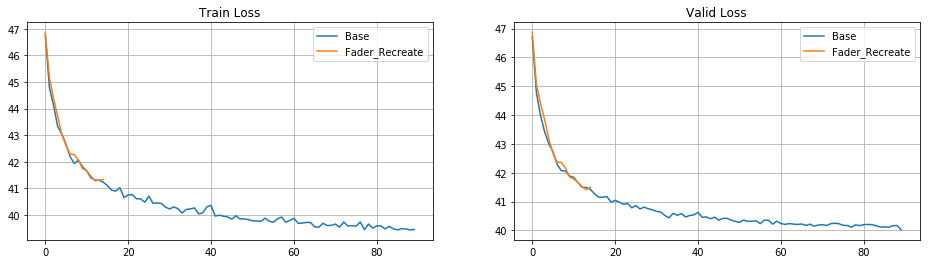

In [22]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(tm_base.data.train_loss)
plt.plot(tm_fader.data.train_loss)
plt.grid(True)
plt.title('Train Loss')
plt.legend({'Base', 'Fader_Recreate'})

plt.subplot(1,2,2)
plt.plot(tm_base.data.valid_loss)
plt.plot(tm_fader.data.valid_loss)
plt.grid(True)
plt.title('Valid Loss')
plt.legend({'Base', 'Fader_Recreate'})

#### Conclusion: Fader_recreate is working correctly

### Next Step: Rebuilt training Monitor for fader_recreate with all the other metrics built in

 ```python
 calc_eval_curves(checkpoint_folder='checkpoints/vctk-all',
                     data='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all',
                     speaker_recognition_checkpoint='checkpoints/speaker_recognition_vctk_all/bestmodel.pth',
                     speaker_recognition_exp_name='notebook_test',
                     exp_name='vctk_all_recompute_20180716',
                     max_seq_len=1000,
                     nspk=107,
                     gpu=0,
                     batch_size=64,
                     seed=1,
                     eval_epochs=20,
                     b_teacher_force=True,
                     b_use_train_noise=True,
                     start_epoch=1,
                     end_epoch=90,
                     step_epoch=5
                     )
 ```

In [29]:
tm_recalc = tm.TrainingMonitor('fader_recreate_baseline_eval_curves_20180718.csv', 'fader_recreate_baseline_eval_curves_20180718', path="training_logs")

In [30]:
tm_recalc.disp()

,epoch,update_time,train_loss,valid_loss,mcd,speaker_recognition_acc_eval
0,1,18-Jul-2018 10:32:46,46.881140,46.872669,NaN,0.989914
1,2,18-Jul-2018 10:36:29,44.998672,45.093546,NaN,0.994476
2,3,18-Jul-2018 10:40:15,44.367036,44.408469,NaN,0.988713
3,4,18-Jul-2018 10:43:56,43.852528,43.839620,NaN,0.992315


In [33]:
#tm_fader.disp()

### Add discriminator metrics to TrainingMonitor

##### Calculated during training

In [52]:
tm_tmp = tm.TrainingMonitor('fader_recreate_baseline_20180717_delete.csv', 'fader_recreate_baseline_eval_curves_20180718', path="training_logs")

In [53]:
tm_tmp.disp()

,epoch,update_time,train_loss,valid_loss,disc_loss,disc_accuracy
0,15.0,18-Jul-2018 11:15:50,41.173954,41.483030,0.689644,0.452632
1,16.0,18-Jul-2018 11:34:58,41.266702,41.526643,0.684302,0.410526


##### Calculated later on using eval_curves

In [48]:
tm_tmp = tm.TrainingMonitor('fader_recreate_baseline_eval_curves_20180718_delete2.csv', 'fader_recreate_baseline_eval_curves_20180718', path="training_logs")

In [49]:
tm_tmp.disp()

,epoch,update_time,train_loss,valid_loss,mcd,speaker_recognition_acc_eval,disc_loss,disc_accuracy
0,15,18-Jul-2018 12:15:19,41.291449,41.483030,NaN,0.990154,0.691119,0.463158
1,16,18-Jul-2018 12:19:11,41.338717,41.480774,NaN,0.990394,0.689796,0.452632


### In debug mode...

In [99]:
tm_tmp = tm.TrainingMonitor('fader_recreate_baseline_20180718_debug_all.csv', 'fader_recreate_baseline_20180718_debug', path="training_logs")

In [100]:
tm_tmp.disp()

,epoch,update_time,train_loss,valid_loss,disc_loss,disc_accuracy,ent_loss
0,1.0,18-Jul-2018 15:42:20,48.661867,48.669212,4.591509,0.578947,-10.962696
1,2.0,18-Jul-2018 16:21:17,52.185746,52.031642,0.960794,0.557895,-62.596085


In [66]:
tm_tmp = tm.TrainingMonitor('fader_recreate_baseline_eval_curves_20180718_debug.csv', 'fader_recreate_baseline_20180718_debug', path="training_logs")

In [67]:
tm_tmp.disp()

,epoch,update_time,train_loss,valid_loss,mcd,speaker_recognition_acc_eval,disc_loss,disc_accuracy,ent_loss
0,1,18-Jul-2018 14:07:45,68.372875,69.052004,NaN,0.051095,12.122985,1.0,0.036996


### 19-Jul: First try at the fader_networks with a lamdba schedule for the loss components
* Starts with zero weighting to the discriminator loss
* Increases this over the epochs
* Starts okay but goes horrible wrong after a few epochs - almost every iteration gives 'not a finite gradient'...
* It appears that the weights in the discriminator network went nuts and this was blowing up the gradients
* Tried putting in weight normalising layers and also just resetting and retraining the discriminator once per epoch
* Now moving to fader_networks_experiments_20170720 for the next stage

In [6]:
tm_tmp = tm.TrainingMonitor('fader_gender_concat_lambda50_20180719.csv', 'fader_recreate_baseline_20180718_debug', path="training_logs")

In [7]:
tm_tmp.disp()

,epoch,update_time,train_loss,valid_loss,disc_loss,disc_accuracy,ent_loss
0,1.0,19-Jul-2018 19:54:20,46.846622,46.616526,32.723633,1.000000,4.055472e-11
1,2.0,19-Jul-2018 20:36:48,45.044577,45.120744,35.799175,0.588785,7.648097e-03
2,3.0,19-Jul-2018 21:19:50,44.728336,44.685362,41.502045,0.551402,1.970565e-02
3,4.0,19-Jul-2018 22:03:06,44.452023,44.377470,57.613098,0.551402,1.103236e-02
4,5.0,19-Jul-2018 22:46:02,44.172475,44.121909,69.574036,0.457944,1.058944e-02
5,6.0,19-Jul-2018 23:28:53,43.714308,43.718800,70.301987,0.411215,3.360996e-03
6,7.0,20-Jul-2018 00:12:02,43.906496,43.752403,68.524826,0.504673,5.596250e-03
7,8.0,20-Jul-2018 00:55:45,43.267978,43.382326,137.217453,0.560748,4.198256e-04
8,9.0,20-Jul-2018 01:38:58,43.359543,43.498727,124.795265,0.570093,7.988854e-03
9,10.0,20-Jul-2018 02:22:21,42.957287,42.964995,168.393433,0.514019,1.403483e-02


One more epoch, starting from checkpoint epoch_19, with reset discriminator and more aggressive lambda to discriminator loss

In [8]:
tm_tmp = tm.TrainingMonitor('fader_gender_concat_lambda50_20180720.csv', 'fader_recreate_baseline_20180718_debug', path="training_logs")

In [10]:
tm_tmp.disp()

,epoch,update_time,train_loss,valid_loss,disc_loss,disc_accuracy,ent_loss
0,20.0,20-Jul-2018 11:36:57,42.078891,42.220183,5.066898,0.579439,0.100417
